In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [57]:
plt.style.use('publication.rc')

In [163]:
run_id = 30198
f_names = ['/Users/gracetytus/gaps/met_analysis/intermediaries/output_'+ str(run_id) +'.txt']

In [164]:
with open(f_names[0]) as in_file:
    variables = next(in_file).strip().split(',')
num_lines = -len(f_names)
for name in f_names:
    with open(name) as in_file:
        num_lines += sum(1 for _ in in_file)
data_dict = {}
for var in variables:
    data_dict[var] = np.zeros(num_lines)

In [166]:
k = 0
progress_bar = tqdm(total=num_lines)
for name in f_names:
    with open(name) as in_file:
        next(in_file)
        for line in in_file:
            for j, dat in enumerate(line.strip().split(',')):
                data_dict[variables[j]][k] = float(dat)
            k += 1
            progress_bar.update(1)


100%|████████████████████████████████████████| 986/986 [00:02<00:00, 456.74it/s]


In [171]:
dy_dx = np.gradient(data_dict['percent_dropped_hg'], data_dict['met'])

threshold = 0.01

try:
    # Find the index where the derivative is close to zero
    stable_idx = np.where((np.abs(dy_dx) < threshold))[0]
except Exception as e: pass


# The first occurrence of stability
if len(stable_idx) > 0:
    transition_point = x[stable_idx[0]]

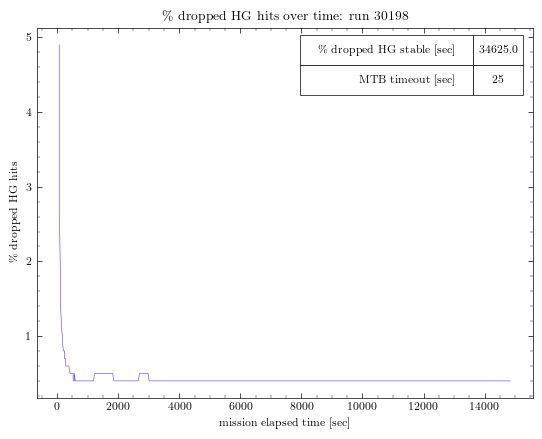

In [173]:
te_timeout = 25

fig, ax = plt.subplots()
ax.plot(data_dict['met'], data_dict['percent_dropped_hg'])
ax.set_title('\\% dropped HG hits over time: run ' + str(run_id))
ax.set_xlabel('mission elapsed time [sec]')
ax.set_ylabel('\\% dropped HG hits')
ax.minorticks_on()

table_data = [['\\% dropped HG stable [sec]', str(transition_point)], ['MTB timeout [sec]', str(te_timeout)]]

table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='upper right')

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.0, 1.0)

num_rows, num_cols = len(table_data), len(table_data[0])

for (row, col), cell in table.get_celld().items():
    if row == -1 or col == -1:
        continue

    cell.set_height(0.08)

    if col == 1:
        cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        cell.set_width(0.1)
    else: 
        cell.set_text_props(horizontalalignment='right', verticalalignment='center')
        cell.set_width(0.35)
        
    cell.set_linewidth(0.5)
plt.savefig('/Users/gracetytus/Downloads/run30198_droppedHG.png')

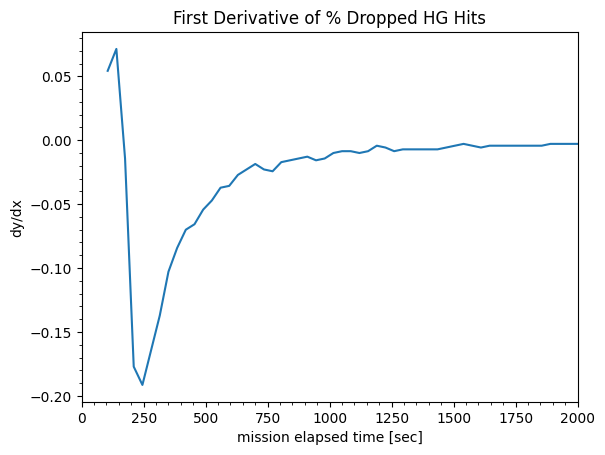

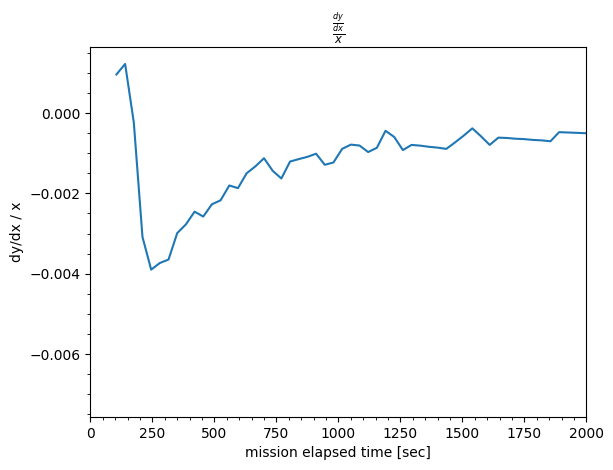

In [51]:
import numpy as np

# Assuming data_dict contains your data
x = data_dict['met']
y = data_dict['percent_dropped_hg']

# Calculate the first derivative of the y-values
dy_dx = np.gradient(y, x)


# Plot the first derivative to visualize where the slope changes
plt.figure()
plt.plot(x, dy_dx)
plt.title('First Derivative of % Dropped HG Hits')
plt.ylabel('dy/dx')
plt.xlabel('mission elapsed time [sec]')
plt.xlim(0,2000)
plt.minorticks_on()
plt.show()

exponential_stopping = dy_dx/y

plt.figure()
plt.plot(x, exponential_stopping)
plt.title(r'$\frac{\frac{dy}{dx}}{x}$')
plt.ylabel('dy/dx / x')
plt.xlabel('mission elapsed time [sec]')
plt.xlim(0,2000)
plt.minorticks_on()
plt.show()